# Part I - Prosper Loan Data Exploration
## by [Samuel Duah Boadi](https://www.linkedin.com/in/samuel-duah-boadi-8ab46944/)

## Introduction

> [Prosper Loan dataset](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1656541692901821&usg=AOvVaw1VL5KUGVpFnFZpbCO2WvlO) contains 113,937 loans with 81 attributes on each loan. Some of the attributes or variables include loan amount, interest/borrower rate, current loan status and borrower income. This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1656541692902482&usg=AOvVaw1GQfjP3lRGR0o5S-1PIkTV) explains all the attributes in the dataset.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset into a dataframe
loan_df = pd.read_csv('data/prosperLoanData.csv')

# View the dataset
print(loan_df.shape)
loan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# data types and no. of null values in the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

For accurate analysis, distinct loans is needed.<br>
The code cell below checks for the number of duplicates in the 'ListingNumber' column.<br>
It then drops duplicates if there is and keeps the last observation in the duplicate.

In [4]:
# change ListingNumber datatype to string
loan_df['ListingNumber'] = loan_df.ListingNumber.astype('str')

# check for duplicates in the dataset
print('The number of duplicates in the ListingNumber column is', loan_df.ListingNumber.duplicated().sum())

# remove duplicates in ListingNumber, 
#   keeping the last observation in the duplicate
loan_df.drop_duplicates(subset='ListingNumber', keep='last', inplace=True)

# Test
if loan_df.ListingNumber.duplicated().sum() == 0:
    print('Duplicates removed')

The number of duplicates in the ListingNumber column is 871
Duplicates removed


A number of attributes have null values in them.<br> 
Loans before July 2009 recorded 'CreditGrade' whiles loans after July 2009 did not.<br>
Some attributes like 'ProsperRating (Alpha)' were introduced for loans after July 2009. These attributes are important for our analysis.<br>
Drop null values in 'Prosper Rating (Alpha)'. 

Drop columns not needed in our analysis like the 'CreditGrade' column.

In [5]:
# drop null values in 'Prosper Rating (Alpha)'
loan_df.dropna(subset=['ProsperRating (Alpha)'], inplace=True)

# test 
print('Are there any null value(s) in "ProsperRating (Alpha)" column now?\n',loan_df['ProsperRating (Alpha)'].isnull().any())

Are there any null value(s) in "ProsperRating (Alpha)" column now?
 False


In [6]:
cols = ['ListingKey', 'ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 
        'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'TotalProsperLoans', 
        'LoanOriginationDate', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 
        'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 
        'BorrowerState', 'Occupation', 'AmountDelinquent', 'CurrentDelinquencies']

In [7]:
# remove columns not needed in the analysis
loan_df.drop(columns=[col for col in loan_df if col not in cols], inplace=True)

# test 
if 'CreditGrade' not in loan_df:
    print('Columns removed')
else:
    print('"CreditGrade" column exist in the dataframe')

Columns removed


'TotalProsperLoans' column contains the number of Prosper loans per borrower at the time this attribute was created.<br>
A null value means a borrower had no prior loans.

In [8]:
# replave NaN with 0 in TotalProsperLoans
loan_df['TotalProsperLoans'].fillna(value=0, inplace=True)
loan_df['TotalProsperLoans'] = loan_df['TotalProsperLoans'].astype('int')

# test 
if loan_df['TotalProsperLoans'].isnull().any() == False:
    print('Null value(s) in "TotalProsperLoans" column \n replaced with an integer 0')

Null value(s) in "TotalProsperLoans" column 
 replaced with an integer 0


In [9]:
# listing categories in dictionary
cate_dict = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
            5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby & Adoption', 9:'Boat', 
             10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
             15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

# replace the numbers in the 'ListingCategory (numeric)' with the category names
loan_df.replace({'ListingCategory (numeric)': cate_dict}, inplace=True)

# rename column 
loan_df.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

In [10]:
# To category
loan_df['Term'] = loan_df.Term.astype('category')

In [11]:
loan_df.describe()

,BorrowerAPR,BorrowerRate,ProsperScore,CurrentDelinquencies,AmountDelinquent,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,MonthlyLoanPayment
count,83982.000000,83982.00000,83982.000000,83982.000000,83982.000000,8.398200e+04,83982.000000,83982.000000,83982.00000
mean,0.226945,0.19630,5.954502,0.323772,953.325998,5.930614e+03,0.341418,9061.224381,291.40139
std,0.080047,0.07475,2.373520,1.113344,7420.327847,8.268432e+03,0.726665,6279.649648,186.47539
min,0.045830,0.04000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.00000
25%,0.163610,0.13590,4.000000,0.000000,0.000000,3.426938e+03,0.000000,4000.000000,157.11250
50%,0.219450,0.18750,6.000000,0.000000,0.000000,5.000000e+03,0.000000,7500.000000,251.28000
75%,0.292540,0.25740,8.000000,0.000000,0.000000,7.083333e+03,0.000000,13500.000000,387.62000
max,0.423950,0.36000,11.000000,51.000000,463881.000000,1.750003e+06,8.000000,35000.000000,2251.51000


In [12]:
loan_df.shape

(83982, 21)

### What is the structure of your dataset?

> The dataset now contains 83,982 distinct loans and twenty-one (21) attributes.

worst -> best<br>
Prosper rating: 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'

### What is/are the main feature(s) of interest in your dataset?

> The main features in the dataset that is of interest is the Borrower's APR and Loan Status 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the features in the dataset that could help support the investigation of features of interest are "Is Borrower Homeowner", Employment Status, Loan amount and Loan term

In [13]:
def readable_str(phrase):
    '''
    A function to change Camel case or Pascal case naming into a more readable name with spaces between words.
    The function takes in a string and returns a string (Word spacing)
    '''
    import re
    
    char = ""
    for i in phrase:
        if(i.isupper()):
            char +="*"+i
        else:
            char +=i
    x=char.split("*")
    x.remove('')
    sentence = ' '.join(x)
    
    sentence = sentence.replace('( ', '(')
    
    # remove spaces from abbrevations
    if (sentence[0] == 'L') & (sentence[2] == 'P'):
        sentence = sentence.replace('L P_', 'LP')
    
    if (sentence[-1] == 'R') & (sentence[-2] == ' '):
        sentence = sentence.replace('A P R', 'APR')
    
    # separate numbers    
    sentence = re.sub('(\d+(\.\d+)?)', r' \1', sentence)
    
    return sentence

## Univariate Exploration

> What's the distribution in the Loan Term and Employment Status?<br>
Which Loan Term was the most (or least) applied? <br>
Are there less home owners taking loans? <br>
How many borrower's income could be verified?

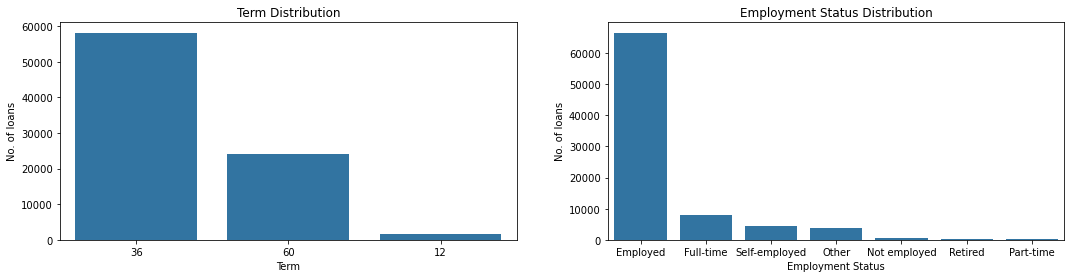

In [14]:
# columns to plot
cols = ['Term', 'EmploymentStatus']
blue_color = sb.color_palette()[0]

# plot bar chart of columns in 'cols'
plt.figure(figsize=(18, 4))
a=0
for col in cols:
    a +=1
    plt.subplot(1, 2, a)
    col_order = loan_df[col].value_counts().index
    sb.countplot(data=loan_df, x=col, color=blue_color, order=col_order)
    plt.title('{} Distribution'.format(readable_str(col)))
    plt.ylabel('No. of loans')
    plt.xlabel(readable_str(col));
plt.subplots_adjust(hspace=0.5)

In [15]:
# count the True and False for the two columns
owner_count = loan_df['IsBorrowerHomeowner'].value_counts()
owner_label = owner_count.index

income_count = loan_df['IncomeVerifiable'].value_counts()
income_label = income_count.index

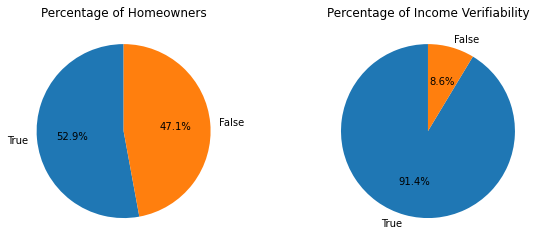

In [16]:
plt.figure(figsize = [10, 4])

plt.subplot(1, 2, 1)
plt.pie(owner_count, labels = owner_label, startangle = 90, autopct='%1.1f%%')
plt.title('Percentage of Homeowners');

plt.subplot(1, 2, 2)
plt.pie(income_count, labels = income_label, startangle = 90, autopct='%1.1f%%')
plt.title('Percentage of Income Verifiability');

More than 50,000 borrowers went for 36-month loan term, about 24,000 borrowers 60-month loan term and about 1,600 were 12-month loan term. 

Majority of the borrowers are employed and their income could verified.

Almost an equal distribution of whether the borrower is a homeowner or not.

> For States, Occupation, Listing Category and Loan Status; what's the top 5 in which borrowers fall under?

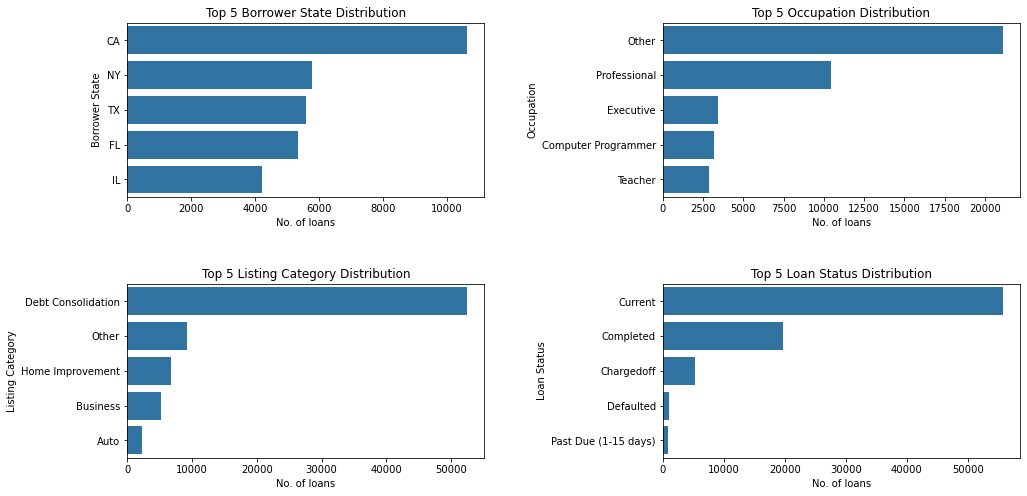

In [17]:
# columns to plot
cols = ['BorrowerState', 'Occupation', 'ListingCategory', 'LoanStatus']
blue_color = sb.color_palette()[0]

# plot bar(h) chart of columns in 'cols'
plt.figure(figsize=(16, 8))
a=0
top_k = 5  # plot top k variables

for col in cols:
    a +=1
    plt.subplot(2, 2, a)
    col_order = loan_df[col].value_counts().head(top_k).index
    sb.countplot(data=loan_df, y=col, color=blue_color, order=col_order)
    plt.title('Top {} {} Distribution'.format(top_k, readable_str(col)))
    plt.xlabel('No. of loans')
    plt.ylabel(readable_str(col));
plt.subplots_adjust(wspace=0.5, hspace=0.5)

California had the most borrowers followed by New York, Texas and Florida. Wyoming was the least state.

About 21,100 borrowers chose 'Other' in the Occupation section which was the highest followed by Professional then Executive.

More than 52,000 borrowers requested for loans for Debt Consolidation. 'Other' and Home Improvement were second and third Listing Category respectively 

> In the next exploration, five variables will be looked at, that is, 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerAPR', 'LoanOriginalAmount' and 'StatedMonthlyIncome'.<br>
Is the distribution unimodal or multimodal?

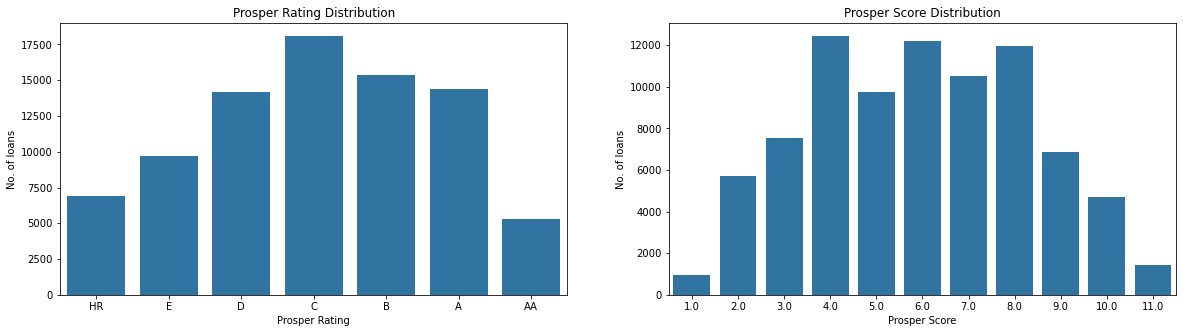

In [18]:
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=loan_df, x='ProsperRating (Alpha)', color=blue_color, order=rating_order)
plt.ylabel('No. of loans')
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating Distribution');

plt.subplot(1, 2, 2)
sb.countplot(data=loan_df, x='ProsperScore', color=blue_color)
plt.ylabel('No. of loans')
plt.xlabel('Prosper Score')
plt.title('Prosper Score Distribution');

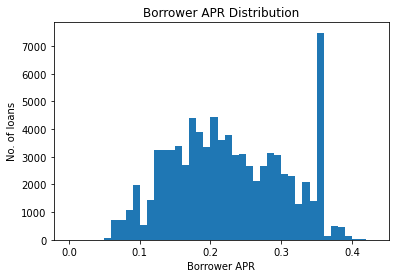

In [19]:
bins = np.arange(0, loan_df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.ylabel('No. of loans')
plt.title('Borrower APR Distribution');

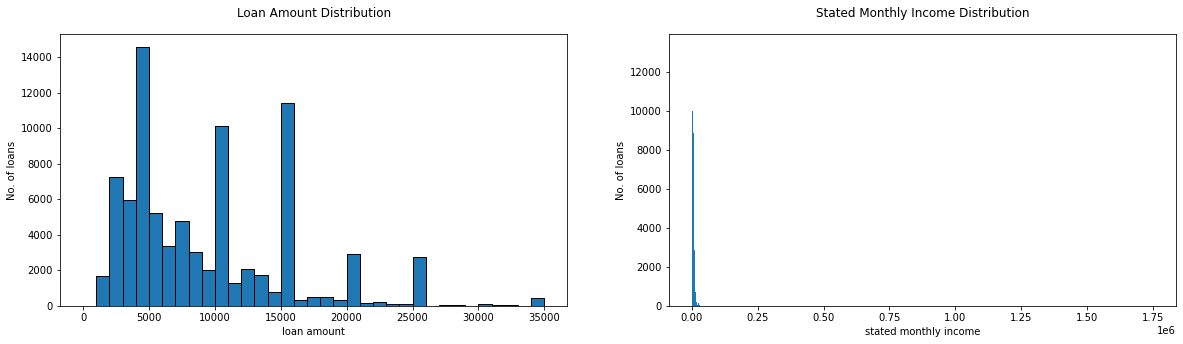

In [20]:
## In this analysis, all data points are used in the visualization
## to get overall view of the complete dataset

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins=bins, edgecolor='black')
plt.ylabel('No. of loans')
plt.xlabel('loan amount')
plt.title('Loan Amount Distribution', y=1.04)

plt.subplot(1, 2, 2)
bins = np.arange(0, loan_df['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins)
plt.ylabel('No. of loans')
plt.xlabel('stated monthly income')
plt.title('Stated Monthly Income Distribution', y=1.04);

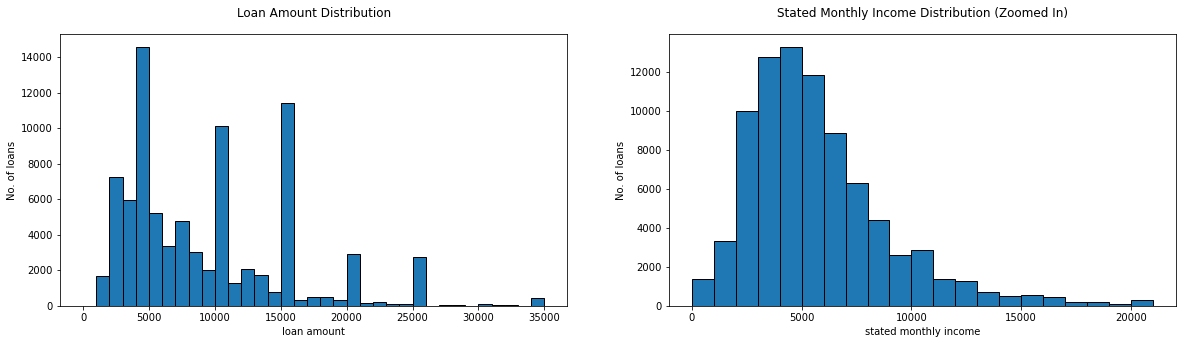

In [21]:
## In this analysis, unlike the one above, outliers are excluded in the visualization

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins=bins, edgecolor='black')
plt.ylabel('No. of loans')
plt.xlabel('loan amount')
plt.title('Loan Amount Distribution', y=1.04)

plt.subplot(1, 2, 2)
bins = np.arange(0, loan_df['StatedMonthlyIncome'].quantile(0.99)+1000, 1000) # top 1% are excluded
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins, edgecolor='black')
plt.xlabel('stated monthly income')
plt.ylabel('No. of loans')
plt.title('Stated Monthly Income Distribution (Zoomed In)', y=1.04);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Prosper Rating and Prosper Score follows a symmetric distribution with Prosper Score having a multimodal distribution whiles Prosper Rating, unimodal.<br>
Prosper Rating has a large peak at 'C'. <br>
Prosper Score has a large peak at '4.0', a second large peak at '6.0' and the third large peak at '8.0'.
Borrower APR has a multimodal distribution with a very high peeak at 0.35.<br>
The distribution of Loan Amount is highly skewed to the right with Stated Monthly Income having symmetric distribution. 
Both distribution are multimodal. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Employment Status feature need to be investigated and improved. The current state of 'Employment Status' gives an usual distribution.

## Bivariate Exploration

> Does the status of being home owner influences the loan status and the Prosper Rating?

In [22]:
# create a dataframe of no.of loans in 'IsBorrowerHomeowner'and 'LoanStatus'
df = loan_df.groupby(['LoanStatus','IsBorrowerHomeowner']).size().reset_index(name='count')
df = df.pivot(index='LoanStatus', columns='IsBorrowerHomeowner', values='count')

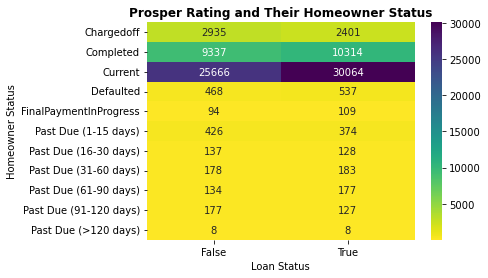

In [23]:
sb.heatmap(df, annot = True, fmt = 'd', cmap='viridis_r')
plt.xlabel('Loan Status')
plt.ylabel('Homeowner Status')
plt.title('Prosper Rating and Their Homeowner Status', weight='bold');

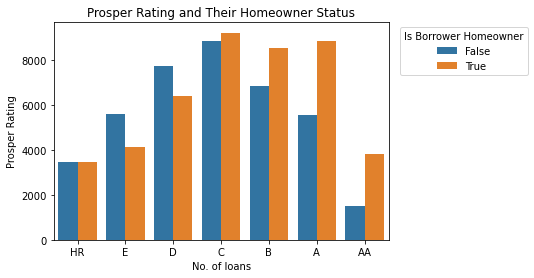

In [24]:
sb.countplot(data = loan_df, x = 'ProsperRating (Alpha)', order=rating_order, hue = 'IsBorrowerHomeowner')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Is Borrower Homeowner')
plt.xlabel('No. of loans')
plt.ylabel('Prosper Rating')
plt.title('Prosper Rating and Their Homeowner Status');

A borrower being a homeowner or not affects his loan.<br> 
Comparing chargedoff loans between homeowners and non-homeowners, more of non-homeowners have their loans chargedoff.

In the Prosper Rating, homeowners tend to fall in the high rating from C to AA whiles low rating (HR - D) have more non-homeowners. 

> What is the trend of the number of loans and Borrower APR since inception?

In [25]:
# Change data type to datetime
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [26]:
# count no. of loans and the average Borrower APR per month and year
df1 = loan_df.groupby([loan_df['LoanOriginationDate'].dt.to_period('M')
                        .rename('Date')]).agg({'ListingNumber':'count','BorrowerAPR':'mean'}).reset_index()

# convert data type to datetime
df1['Date'] = df1['Date'].astype('datetime64[ns]')

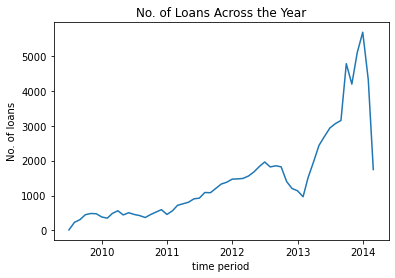

In [27]:
# visualization no. of loans
plt.errorbar(data=df1, x='Date', y='ListingNumber')
plt.xlabel('time period')
plt.ylabel('No. of loans')
plt.title('No. of Loans Across the Year');

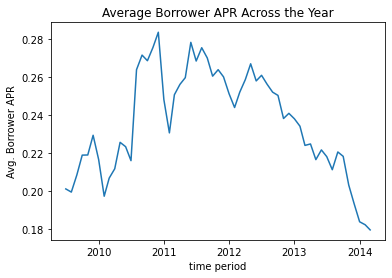

In [28]:
# visualization of average borrower APR
plt.errorbar(data=df1, x='Date', y='BorrowerAPR')
plt.xlabel('time period')
plt.ylabel('Avg. Borrower APR')
plt.title('Average Borrower APR Across the Year');

Loans has increased steadily from 2010 to mid 2012. There was a decline in number of loans from 3rd quarter of 2012 to early 2013 which then so a sharp increase of loans to 2014.

The average Borrower APR has sharp increase and decrease from pre 2010 to 2nd quarter of 2012 then a steady declince from 0.26 to 0.18 in 2014

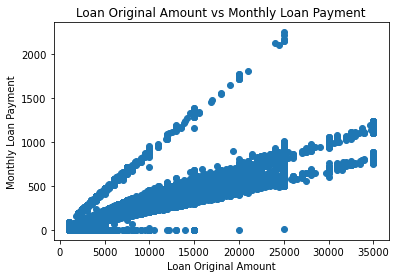

In [29]:
# Scatter plot
plt.scatter(data=loan_df, x='LoanOriginalAmount', y= 'MonthlyLoanPayment')
plt.xlabel(readable_str('LoanOriginalAmount'))
plt.ylabel(readable_str('MonthlyLoanPayment'))
plt.title('{} vs {}'.format(readable_str('LoanOriginalAmount'), readable_str('MonthlyLoanPayment')));

Monthly Loan Payment versus Loan Amount was almost a perfect positive correlation. This was an expected results.

In [30]:
def box_violin_plts(x, y, r=0, df=loan_df):
    '''
    A function to return a bivariate visualization, 
    that is, plots representing the relationship between 
    two variables.
    One variable should be a qualitative varible and the other
    a quatitative variable.
    
    Parameters:       df  -  the dataframe
                 x & y  -  a qualitative/quantitative variable
                 
    returns:      two plots in one figure
                  box plot on the left and
                  a violin plot on the right 
    '''
    
    
    # TWO PLOTS IN ONE FIGURE
    blue_color = sb.color_palette()[0]
    plt.figure(figsize = [16, 5])

    # LEFT plot: box plot
    plt.subplot(1, 2, 1)
    ax = sb.boxplot(data=df, x=x, y=y, color=blue_color)
    plt.title(f"Distribution of {readable_str(y)} by {readable_str(x)}", weight='bold')
    plt.xlabel(readable_str(x))
    plt.ylabel(readable_str(y))
    plt.xticks(rotation=r);
    

    # RIGHT plot: violin plot
    plt.subplot(1, 2, 2)
    sb.violinplot(data=df, x=x, y=y, color=blue_color, innner='quartile')
    plt.title(f"Distribution of {readable_str(y)} By {readable_str(x)}", weight='bold')
    plt.xlabel(readable_str(x))
    plt.ylabel(readable_str(y))
    plt.xticks(rotation=r)
    plt.ylim(ax.get_ylim()); # set y-axis limits to be same as left plot

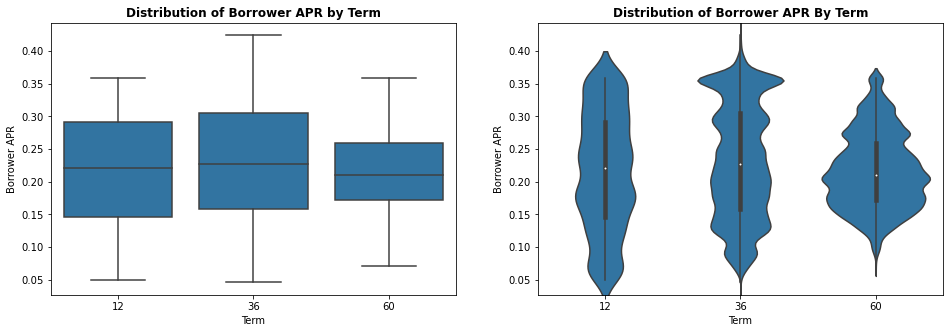

In [31]:
box_violin_plts('Term', 'BorrowerAPR')

The mean Borrower Annual Percentage Rate, APR across loan term are 0.22, 0.23 and 0.22 for 12, 36 and 60 loan term respectively.<br>
From the dataset, the 60 loan term's APR fall in-between the 12 loan term which also in turn falls in-between the 36 loan term.

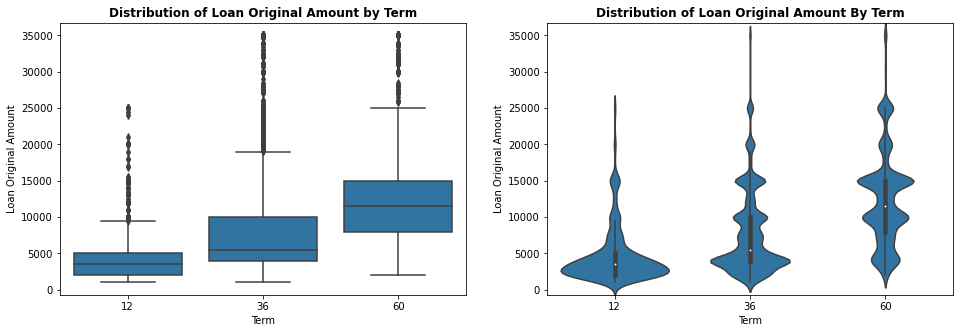

In [32]:
box_violin_plts('Term', 'LoanOriginalAmount')

From the visualization, low loan amount is likely to paid off within the 12 loan term whiles a high loan amount is paid off within the 60 loan term. This is an expected behaviour. 

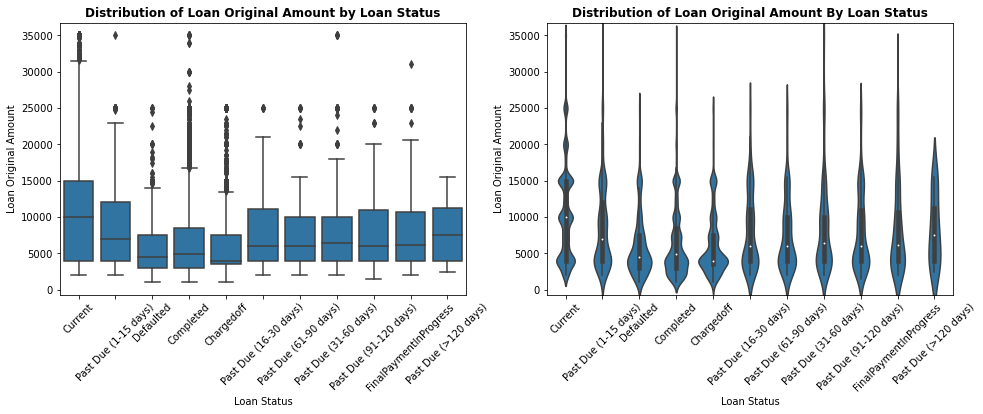

In [33]:
box_violin_plts('LoanStatus', 'LoanOriginalAmount', r=45)

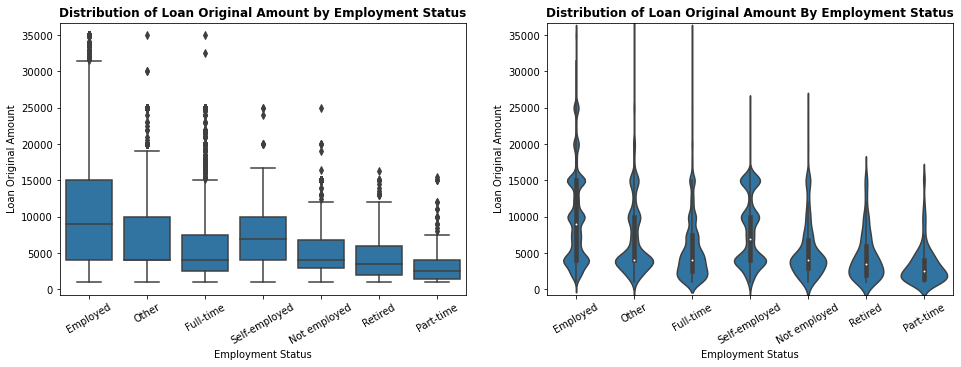

In [34]:
box_violin_plts('EmploymentStatus', 'LoanOriginalAmount', r=30)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> High Prosper Rating tend to have more homeowners than non-homeowners whiles low Prosper Rating tend to have more non-homeowners than homeowners.<br>
The number of loans are increasing each passing year with the average borrower APR decreasing since 2012.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average loan amount chargedoff is the lowest in the Loan status category. Excluding 'current', the average of other loan status are almost the same. Does the amount determine how the loan would be chargeoff?  

## Multivariate Exploration

In [35]:
# the average Borrower APR per loan throughout the period
df2 = loan_df.groupby([loan_df['LoanOriginationDate'].dt.to_period('M')
                        .rename('Date'), 'Term']).agg({'ListingNumber':'count','BorrowerAPR':'mean'})

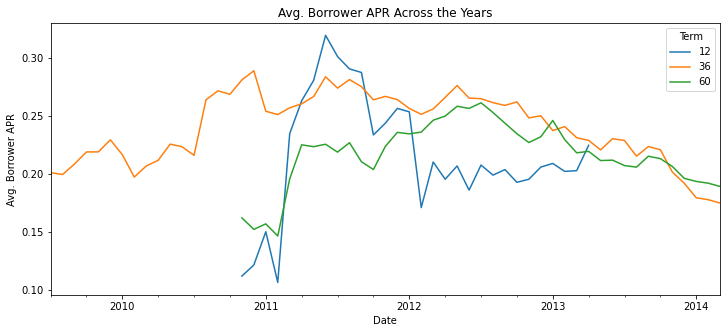

In [36]:
# a line plot of the average borrower APR per the three loan terms across the years

df2['BorrowerAPR'].unstack('Term').plot(figsize=[12, 5])
plt.ylabel('Avg. Borrower APR')
plt.title('Avg. Borrower APR Across the Years');

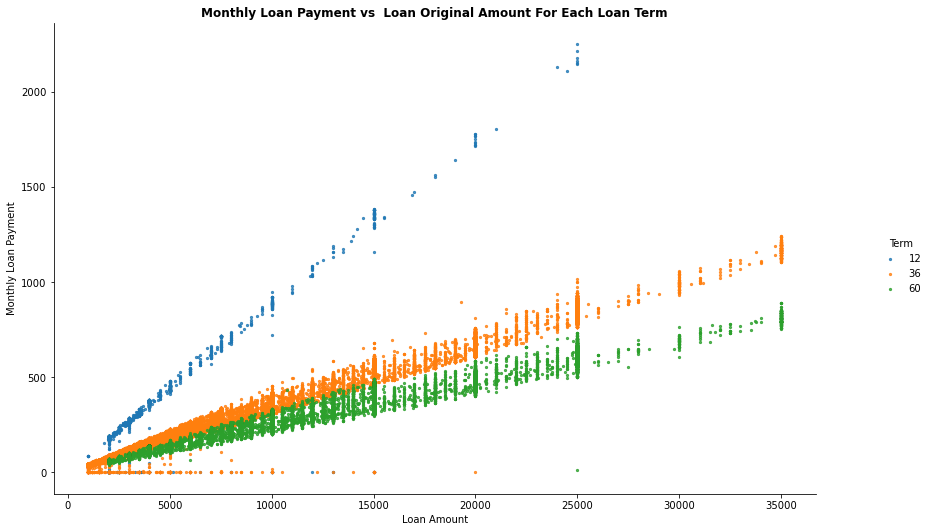

In [37]:
g = sb.FacetGrid(data=loan_df, hue='Term', height=4, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, fit_reg=False, scatter_kws={'s':5})
g.add_legend()
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Loan Payment')
plt.title('Monthly Loan Payment vs  Loan Original Amount For Each Loan Term', weight='bold')

# set figure dimensions
g.fig.set_size_inches(14, 8);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The average borrower APR for each loan term showed different patterns across the year.<br>
From the second quarter of 2012, the average borrower APR for 36 and 60 loan terms were close and were steadily declining.<br>
The 12 loan after 2012 had rougly steady average but subtly increasing from the last quarter the said year.<br>
The monthly loan payment is very high for 12 loan term, followed by the 36 loan term which is followed closely by the 60 loan term.

### Were there any interesting or surprising interactions between features?

> It's worthy to note that the Borrower APR does not affect the Prosper Rating.

## Conclusions
> The howeowner status affects the Prosper Rating but surprisingly the Borrower APR does not.<br>
Loan request will continue to increase from year to year, paying off mostly within the 36 loan term.

In [38]:
# save the cleaned dataset
loan_df.to_csv('data/prosperLoanData_clean.csv', index=False)